In [70]:
from IPython.display import display, HTML
import os
import time
import pickle
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 300)
%matplotlib inline

def load_data(filename):
    with open(filename, 'rb') as fin:
        return pickle.load(fin)
    
def save_data(obj, filename):
    with open(filename, 'wb+') as fout:
        pickle.dump(obj, fout)
        
root_path = 'C:/Users/yuanl/Documents/MelbDatathon2017/'

In [2]:
def merge_patients(i):
    df1 = pd.read_csv(root_path + 'Transactions/patients_%d.txt' % i, sep='\t')
    df2 = pd.read_csv(root_path + 'Missing/missing_patients_%d.txt' % i, sep='\t')
    df = pd.concat([df1, df2], axis=0, copy=False)
    df.drop_duplicates(inplace=True)
    df.sort_values(['Patient_ID', 'Dispense_Week'], inplace=True)
    df.set_index(np.arange(df.shape[0]), inplace=True)
    return df

In [3]:
df = merge_patients(1)

In [4]:
df.columns

Index(['Patient_ID', 'Store_ID', 'Prescriber_ID', 'Drug_ID',
       'SourceSystem_Code', 'Prescription_Week', 'Dispense_Week', 'Drug_Code',
       'NHS_Code', 'IsDeferredScript', 'Script_Qty', 'Dispensed_Qty',
       'MaxDispense_Qty', 'PatientPrice_Amt', 'WholeSalePrice_Amt',
       'GovernmentReclaim_Amt', 'RepeatsTotal_Qty', 'RepeatsLeft_Qty',
       'StreamlinedApproval_Code'],
      dtype='object')

In [5]:
%%time
transactions = []
for i in range(1, 51):
#     transactions.append(merge_patients(i))
    print('%d\t'%i, time.ctime())
    df = merge_patients(i)
    df = df[['Patient_ID', 'Store_ID', 'Prescriber_ID', 'Drug_ID', 'Prescription_Week', 'Dispense_Week',
             'Script_Qty', 'Dispensed_Qty', 'MaxDispense_Qty', 'PatientPrice_Amt', 'WholeSalePrice_Amt',
             'GovernmentReclaim_Amt', 'RepeatsTotal_Qty', 'RepeatsLeft_Qty']]
#     df = df[['Patient_ID', 'Store_ID', 'Prescriber_ID', 'Drug_ID', 'Prescription_Week', 'Dispense_Week',
#              'PatientPrice_Amt', 'WholeSalePrice_Amt', 'GovernmentReclaim_Amt']] 
#      df.dropna(axis=0, how='any', subset=['PatientPrice_Amt', 'WholeSalePrice_Amt', 'GovernmentReclaim_Amt'],
#               inplace=True)
    df.to_csv(root_path + 'Final_summary_v2/patient_%d.csv'%i, index=False)
print('finished.')

1	 Fri May  5 09:04:14 2017
2	 Fri May  5 09:04:31 2017
3	 Fri May  5 09:04:55 2017
4	 Fri May  5 09:05:15 2017
5	 Fri May  5 09:05:35 2017
6	 Fri May  5 09:05:55 2017
7	 Fri May  5 09:06:18 2017
8	 Fri May  5 09:06:38 2017
9	 Fri May  5 09:06:59 2017
10	 Fri May  5 09:07:20 2017
11	 Fri May  5 09:07:40 2017
12	 Fri May  5 09:08:01 2017
13	 Fri May  5 09:08:21 2017
14	 Fri May  5 09:08:41 2017
15	 Fri May  5 09:09:01 2017
16	 Fri May  5 09:09:22 2017
17	 Fri May  5 09:09:43 2017
18	 Fri May  5 09:10:03 2017
19	 Fri May  5 09:10:25 2017
20	 Fri May  5 09:10:47 2017
21	 Fri May  5 09:11:08 2017
22	 Fri May  5 09:11:28 2017
23	 Fri May  5 09:11:48 2017
24	 Fri May  5 09:12:10 2017
25	 Fri May  5 09:12:30 2017
26	 Fri May  5 09:12:50 2017
27	 Fri May  5 09:13:07 2017
28	 Fri May  5 09:13:24 2017
29	 Fri May  5 09:13:41 2017
30	 Fri May  5 09:13:58 2017
31	 Fri May  5 09:14:15 2017
32	 Fri May  5 09:14:35 2017
33	 Fri May  5 09:14:52 2017
34	 Fri May  5 09:15:09 2017
35	 Fri May  5 09:15:26

In [6]:
df = pd.read_csv(root_path + 'Final_summary_v2/patient_9.csv')
print(df.WholeSalePrice_Amt.max())
df.loc[df.WholeSalePrice_Amt==1041874.5, 'WholeSalePrice_Amt'] = 1499.1
print(df.WholeSalePrice_Amt.max())
df.to_csv(root_path + 'Final_summary_v2/patient_9.csv', index=False)

1041874.5
19367.69


read all patients

In [10]:
def read_patient(i):
    df = pd.read_csv(root_path + 'Final_summary_v2/patient_%d.csv'%i)
#     df = df[['Patient_ID', 'Store_ID', 'Prescriber_ID', 'Drug_ID', 'Prescription_Week', 'Dispense_Week',
#              'Script_Qty', 'Dispensed_Qty', 'MaxDispense_Qty', 'PatientPrice_Amt', 'WholeSalePrice_Amt',
#              'GovernmentReclaim_Amt', 'RepeatsTotal_Qty', 'RepeatsLeft_Qty']]
    df.rename(columns={'Patient_ID':'PID', 'Store_ID':'SID', 'Prescriber_ID':'PresID', 'Drug_ID':'DID',
                       'Prescription_Week':'PresWeek', 'Dispense_Week':'DispWeek',
                       'Script_Qty':'SQty', 'Dispensed_Qty':'DQty', 'MaxDispense_Qty':'MaxD',
                       'PatientPrice_Amt':'PPrice', 'WholeSalePrice_Amt':'WSPrice',
                       'GovernmentReclaim_Amt':'GReclaim', 'RepeatsTotal_Qty':'RT', 'RepeatsLeft_Qty':'RL'},
              inplace=True)
    return df

In [8]:
%%time
transactions = []
for i in range(1, 51):
    print(i, end=' ')
    transactions.append(read_patient(i))
print('finish loading')
transactions = pd.concat(transactions, ignore_index=True)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 finish loading
Wall time: 1min 41s


In [51]:
transactions['Year'] = transactions.DispWeek.values.astype('datetime64[Y]').astype(int) + 1970

In [37]:
num_patients = transactions.PID.max()

In [5]:
def basic_info(df):
    print('GovernmentReclaim:', df.GovernmentReclaim.sum())

In [17]:
transactions.loc[transactions.SQty==20000]

,PID,SID,PresID,DID,PresWeek,DispWeek,SQty,DQty,MaxD,PPrice,WSPrice,GReclaim,RT,RL
18810875,153220,-9999,57154,8026,2012-06-10,2013-03-31,20000,NaN,NaN,8.85,8.17,7.08,0.0,0.0
18810926,153220,-9999,57154,8026,2013-01-13,2013-07-07,20000,NaN,NaN,8.85,8.17,7.19,0.0,0.0
18810986,153220,-9999,57154,8026,2013-10-27,2013-11-10,20000,NaN,NaN,8.85,8.17,7.19,0.0,0.0
40963743,345948,-9999,14771,8026,2013-02-10,2013-06-30,20000,NaN,NaN,16.00,8.17,0.00,5.0,4.0
40963789,345948,-9999,14771,8026,2012-12-16,2013-09-08,20000,NaN,NaN,21.05,8.17,0.00,5.0,5.0
40963846,345948,-9999,14771,8026,2012-12-16,2013-12-01,20000,NaN,NaN,21.05,8.17,0.00,5.0,4.0
40963869,345948,-9999,14771,8026,2012-12-16,2014-01-19,20000,NaN,NaN,21.05,8.17,0.00,5.0,0.0


In [21]:
transactions.loc[transactions.RL==28995]

,PID,SID,PresID,DID,PresWeek,DispWeek,SQty,DQty,MaxD,PPrice,WSPrice,GReclaim,RT,RL
7279954,59171,2349,38686,6523,2010-11-07,2011-03-20,30,30.0,NaN,5.6,NaN,36.53,5.0,28995.0
7279955,59171,1836,38686,6523,2010-11-07,2011-03-20,30,30.0,NaN,5.6,NaN,36.53,5.0,28995.0


In [22]:
veteran_drug_transactions = transactions.loc[np.in1d(transactions.DID.values, [7427, 7428, 7429]), :]

In [23]:
np.unique(veteran_drug_transactions.DID.values, return_counts=True)

(array([7427, 7428, 7429], dtype=int64),
 array([   83, 29720,  1097], dtype=int64))

In [24]:
veteran_PIDs = veteran_drug_transactions.PID.unique()
len(veteran_PIDs)

179

In [28]:
veteran_transactions = transactions.loc[np.in1d(transactions.PID.values, veteran_PIDs), :]

In [26]:
patient_lookup = pd.read_csv(root_path + 'Lookups/patients.txt', sep='\t', index_col='Patient_ID')

In [89]:
store_lookup = pd.read_csv(root_path + 'Lookups/stores.txt', sep='\t', index_col='Store_ID')

In [93]:
unique_gender, count_gender = np.unique(patient_lookup.loc[veteran_PIDs, 'gender'].values, return_counts=True)

In [106]:
unique_gender, count_gender

(array(['F', 'M', 'U'], dtype=object), array([96, 70, 13], dtype=int64))

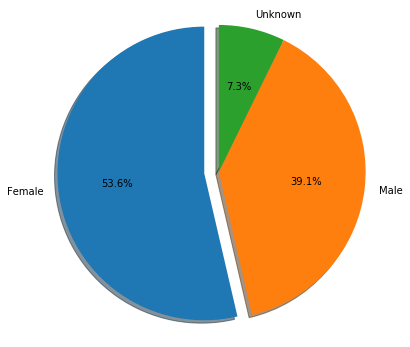

In [105]:
def test():
    old_params = matplotlib.rcParams['figure.figsize']
    matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
    
    labels = ['Female', 'Male', 'Unknown']
    sizes = count_gender
    explode = (0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

    fig, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    fig.savefig('Gender distribution.png', bbox_inches='tight')
    plt.show()
    
    matplotlib.rcParams['figure.figsize'] = old_params
test()

In [111]:
drug_lookup = pd.read_csv('./drug_with_illness_lookup.csv', encoding='utf-16', sep='\t', index_col='DID')

In [123]:
veteran_count = {}
for illness in drug_lookup.ChronicIllness.dropna().unique():
    illness_drugs = drug_lookup.loc[drug_lookup.ChronicIllness==illness].index.values
    unique_illness_PIDs = veteran_transactions.loc[np.in1d(veteran_transactions.DID.values,
                                                           illness_drugs)].PID.unique()
    veteran_count[illness] = len(unique_illness_PIDs)    

In [124]:
veteran_count

{'Anti-Coagulant': 75,
 'Chronic Obstructive Pulmonary Disease (COPD)': 88,
 'Depression': 125,
 'Diabetes': 60,
 'Epilepsy': 82,
 'Heart Failure': 108,
 'Hypertension': 99,
 'Immunology': 2,
 'Lipids': 155,
 'Osteoporosis': 71,
 'Urology': 32}

In [129]:
for x in sorted(veteran_count.items()):
    print('%s\t%d' % x)

Anti-Coagulant	75
Chronic Obstructive Pulmonary Disease (COPD)	88
Depression	125
Diabetes	60
Epilepsy	82
Heart Failure	108
Hypertension	99
Immunology	2
Lipids	155
Osteoporosis	71
Urology	32


In [130]:
num_patients

558352

In [125]:
all_count = {}
for illness in drug_lookup.ChronicIllness.dropna().unique():
    print(illness)
    illness_drugs = drug_lookup.loc[drug_lookup.ChronicIllness==illness].index.values
    unique_illness_PIDs = transactions.loc[np.in1d(transactions.DID.values,
                                                   illness_drugs)].PID.unique()
    all_count[illness] = len(unique_illness_PIDs)

In [128]:
for x in sorted(all_count.items()):
    print('%s\t%d' % x)

Anti-Coagulant	41961
Chronic Obstructive Pulmonary Disease (COPD)	58358
Depression	192245
Diabetes	126850
Epilepsy	84465
Heart Failure	185892
Hypertension	256490
Immunology	3970
Lipids	355882
Osteoporosis	37387
Urology	22234


In [54]:
trans_90353 = transactions.loc[transactions.PID==90353, :]

In [35]:
GReclaim = np.bincount(transactions.PID.values-1, transactions.GReclaim.fillna(0).values)
PPrice   = np.bincount(transactions.PID.values-1, transactions.PPrice.fillna(0).values)

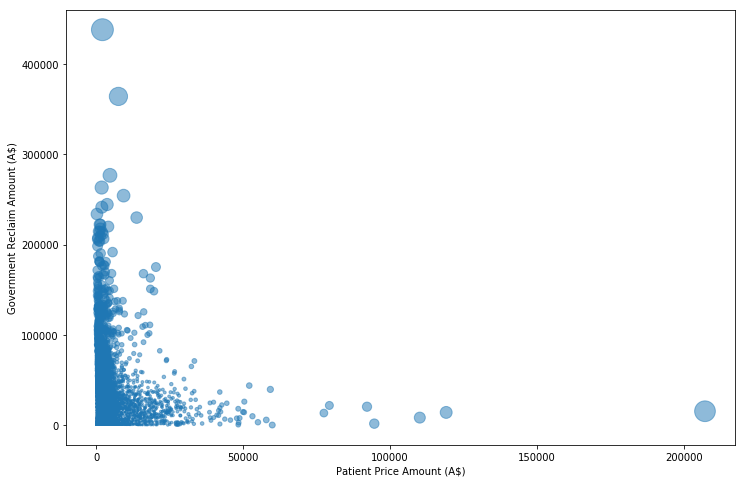

In [87]:
def test():
    old_params = matplotlib.rcParams['figure.figsize']
    matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)
    
    fig, ax = plt.subplots()
    
    ax.scatter(PPrice, GReclaim, alpha=0.5, s=(GReclaim/20000)**2+(PPrice/10000)**2)
#     ax.scatter(PPrice[90352], GReclaim[90352], 
#                s=(GReclaim[90352]/20000)**2 + (PPrice[90352]/10000)**2 + 20)
    plt.ylabel('Government Reclaim Amount (A$)')
    plt.xlabel('Patient Price Amount (A$)')
    plt.show()
    fig.savefig('Scatter PPrice vs. GReclaim.png', bbox_inches='tight')
    
    matplotlib.rcParams['figure.figsize'] = old_params
test()

In [71]:
def plot_df(df):
    old_params = matplotlib.rcParams['figure.figsize']
    matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)
    
    n_groups = df.shape[0]

    plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    fig, ax1 = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 0.6

    rects1 = ax1.bar(index, df.PPrice, bar_width,
                     alpha=opacity, label='PatientPrice', color='blue')
    
    rects3 = ax1.bar(index + bar_width, df.GReclaim, bar_width,
                     alpha=opacity, label='GovernmentReclaim', color='red')


    ax1.set_ylabel('Amount (A$)')
#     ax1.set_ylim(0, 5e8)
    
#     ax2 = ax1.twinx()
#     ax2.plot(index + bar_width / 2, df.Transactions, lw=2, color='black')
#     ax2.set_ylabel('Transactions')
#     ax2.set_ylim(0.8e7, 1.2e7)

    plt.xlabel('Year')
    plt.xticks(index + bar_width / 2, df.index)
    
    plt.title('Summary by year')
    # ask matplotlib for the plotted objects and their labels
#     lines1, labels1 = ax1.get_legend_handles_labels()
#     lines2, labels2 = ax2.get_legend_handles_labels()
#     ax2.legend(lines1 + lines2, labels1 + labels2, loc=0)

    plt.legend()
    plt.tight_layout()
    plt.show()
    
    fig.savefig('test.png', bbox_inches='tight')
    
    matplotlib.rcParams['figure.figsize'] = old_params

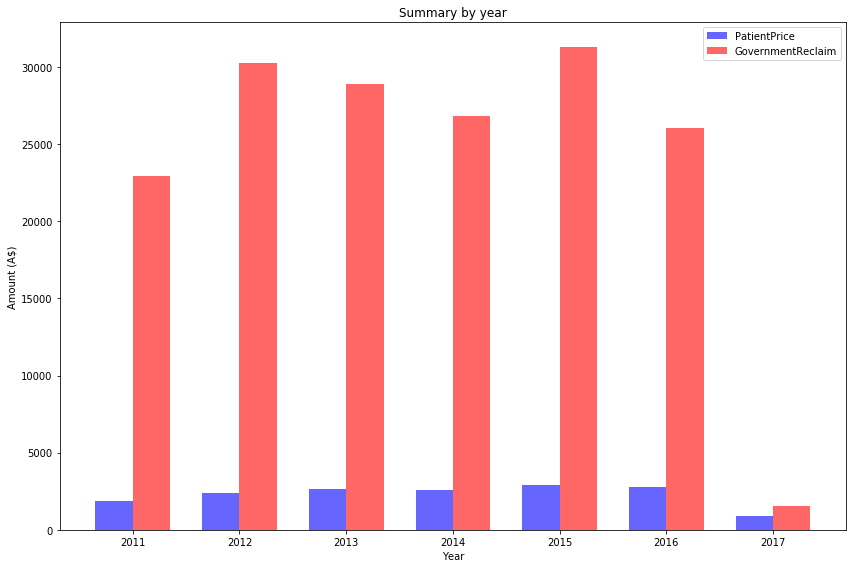

In [72]:
def test(df):
    df = df.dropna(subset=['PPrice', 'GReclaim'], how='any')
    unique_year, encoded_year = np.unique(df.Year.values, return_inverse=True)
    PPrice_90353_by_year   = np.bincount(encoded_year, df.PPrice.values)
    GReclaim_90353_by_year = np.bincount(encoded_year, df.GReclaim.values)
    plot = pd.DataFrame({'PPrice': PPrice_90353_by_year, 'GReclaim': GReclaim_90353_by_year}, index=unique_year)
    plot_df(plot)
test(trans_90353)